# NBA Salaries QuAM D2

## D2: Final Dataset - Data Collection, Analysis, Wrangling, Feature Engineering

### By Andrej Pozderac & Andrew Edward

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.dpi']= 100

#### Library to be used to handle inflation for salaries for analysing historical data, inspired from:
https://medium.com/analytics-vidhya/adjusting-for-inflation-when-analysing-historical-data-with-python-9d69a8dcbc27

In [2]:
!pip install cpi

In [3]:
import cpi

def inflate_column(data, column,year):
    return data.apply(lambda x: cpi.inflate(x[column], 
                      x[year]), axis=1)

C:\Users\Andrew\anaconda3\lib\site-packages\cpi\__init__.py:46: StaleDataWarning: CPI data is out of date. To accurately inflate to today's dollars, you must run `cpi.update()`.
  warnings.warn(StaleDataWarning())


## D2.1: Data Collection

The three main data sets we are using are as follows:
The first is about general player information: the year they played in (that season's end), their generic information - age, height, weight, and the team which they play for. This dataset will be important as we can then combine the season stats (see below) with generic information of the player we believe will be important - mainly their age, height, and weight.

The second dataset is the season stats dataset. This dataset has the season stats in great detail (about 50 features) for each player depending on the year in which they play in. We will be using this information to see which ones are most impactful for determening a high value of a salary. This data will be added to one feature from our third data set.

The third data set has the Salary information alongside some other play information, most importantly, the year which we will use to match the correct salary to the correct player in the correct season. This will be the one feature which we will add onto our second dataset and use it for finding the most important features in our data, the KPIs, as well as the main training target feature for the QuAM classifier moving forward.

The final dataset which we will construct will be made of the main defining values of the player names, as well as their  generic information as height and weight. The most important 15 KPIs selected through feature engineering, and the adjusted for inflation player salaries.

The player stat features are composed of most important basketball information regarding players, and these are focused on players game's, performance in matches, different types of performance in shots, defensive and offensive performance, in-team and between-team play such as turnovers or assists, etc. These we will not manually select, as mentioned above, but rather run them through kNN classifier to pick the strongest features.

The challneges that we forsee moving forward will be adjusting salary for inflation, connecting the datasets from different sources, based on different players and years, as well as cleaning the whole data of imporper or missing values.

## D2.2.1: Data Analysis
D2.2.2 is after picking key features from the combination of both datasets

### Dataset 1: NBA Players salaries

You can find the dataset here: https://www.kaggle.com/whitefero/nba-player-salary-19902017

In [4]:
# Read the CSV file
salaries = pd.read_csv('./player_salaries/salaries_per_year.csv')
salaries

,Register Value,Player Name,Salary,Season Start,Season End,Team,Full Team Name
0,1,A.C. Green,"$1,750,000.00",1990,1991,LAL,Los Angeles Lakers
1,354,A.C. Green,"$1,750,000.00",1991,1992,LAL,Los Angeles Lakers
2,727,A.C. Green,"$1,750,000.00",1992,1993,LAL,Los Angeles Lakers
3,1103,A.C. Green,"$1,885,000.00",1993,1994,PHO,Phoenix Suns
4,1497,A.C. Green,"$6,472,600.00",1994,1995,PHO,Phoenix Suns
...,...,...,...,...,...,...,...
11832,6283,Zydrunas Ilgauskas,"$8,740,000.00",2005,2006,CLE,Cleveland Caveliers
11833,6658,Zydrunas Ilgauskas,"$9,442,697.00",2006,2007,CLE,Cleveland Caveliers
11834,7063,Zydrunas Ilgauskas,"$10,142,156.00",2007,2008,CLE,Cleveland Caveliers
11835,7485,Zydrunas Ilgauskas,"$10,841,615.00",2008,2009,CLE,Cleveland Caveliers


Here, as we are using Salary data from 1990, we are ensuring that we are accounting for inflation. First we change the $XXX values into integers and then using the library from above we are adjusting the values for inflation. This results in the correct features being picked later on as the target value of salary has now been adjusted for realm time values.

In [5]:
salaries['Salary'] = salaries['Salary'].str.slice(1,-1)
salaries['Salary'] = salaries['Salary'].str.replace(",","")

salaries["Salary"] = pd.to_numeric(salaries["Salary"], downcast="float")

In [6]:
salaries.dtypes

Register Value      int64
Player Name        object
Salary            float32
Season Start        int64
Season End          int64
Team               object
Full Team Name     object
dtype: object

In [7]:
salaries['Salary'] = inflate_column(salaries, 'Salary', 'Season End')
salaries

,Register Value,Player Name,Salary,Season Start,Season End,Team,Full Team Name
0,1,A.C. Green,3.226412e+06,1990,1991,LAL,Los Angeles Lakers
1,354,A.C. Green,3.132126e+06,1991,1992,LAL,Los Angeles Lakers
2,727,A.C. Green,3.041088e+06,1992,1993,LAL,Los Angeles Lakers
3,1103,A.C. Green,3.193905e+06,1993,1994,PHO,Phoenix Suns
4,1497,A.C. Green,1.066480e+07,1994,1995,PHO,Phoenix Suns
...,...,...,...,...,...,...,...
11832,6283,Zydrunas Ilgauskas,1.088629e+07,2005,2006,CLE,Cleveland Caveliers
11833,6658,Zydrunas Ilgauskas,1.143583e+07,2006,2007,CLE,Cleveland Caveliers
11834,7063,Zydrunas Ilgauskas,1.182875e+07,2007,2008,CLE,Cleveland Caveliers
11835,7485,Zydrunas Ilgauskas,1.268968e+07,2008,2009,CLE,Cleveland Caveliers


In [8]:
salaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11837 entries, 0 to 11836
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Register Value  11837 non-null  int64  
 1   Player Name     11837 non-null  object 
 2   Salary          11837 non-null  float64
 3   Season Start    11837 non-null  int64  
 4   Season End      11837 non-null  int64  
 5   Team            11837 non-null  object 
 6   Full Team Name  11837 non-null  object 
dtypes: float64(1), int64(3), object(3)
memory usage: 647.5+ KB


In [9]:
salaries.describe()

,Register Value,Salary,Season Start,Season End
count,11837.000000,1.183700e+04,11837.000000,11837.000000
mean,5919.000000,4.171043e+06,2004.419785,2005.419785
std,3417.191903,4.955379e+06,8.168175,8.168175
min,1.000000,3.945967e+03,1990.000000,1991.000000
25%,2960.000000,1.004529e+06,1997.000000,1998.000000
50%,5919.000000,2.281852e+06,2005.000000,2006.000000
75%,8878.000000,5.325593e+06,2012.000000,2013.000000
max,11837.000000,5.105329e+07,2017.000000,2018.000000


After seeing the datatypes of the columns, we explore if there are any NaN objects

In [10]:
nans = np.sum(salaries.isnull())

print('Invalid enteries in the salaries file:')
print(nans)

Invalid enteries in the salaries file:
Register Value    0
Player Name       0
Salary            0
Season Start      0
Season End        0
Team              0
Full Team Name    0
dtype: int64


Then, we do more exploratory analysis using histograms

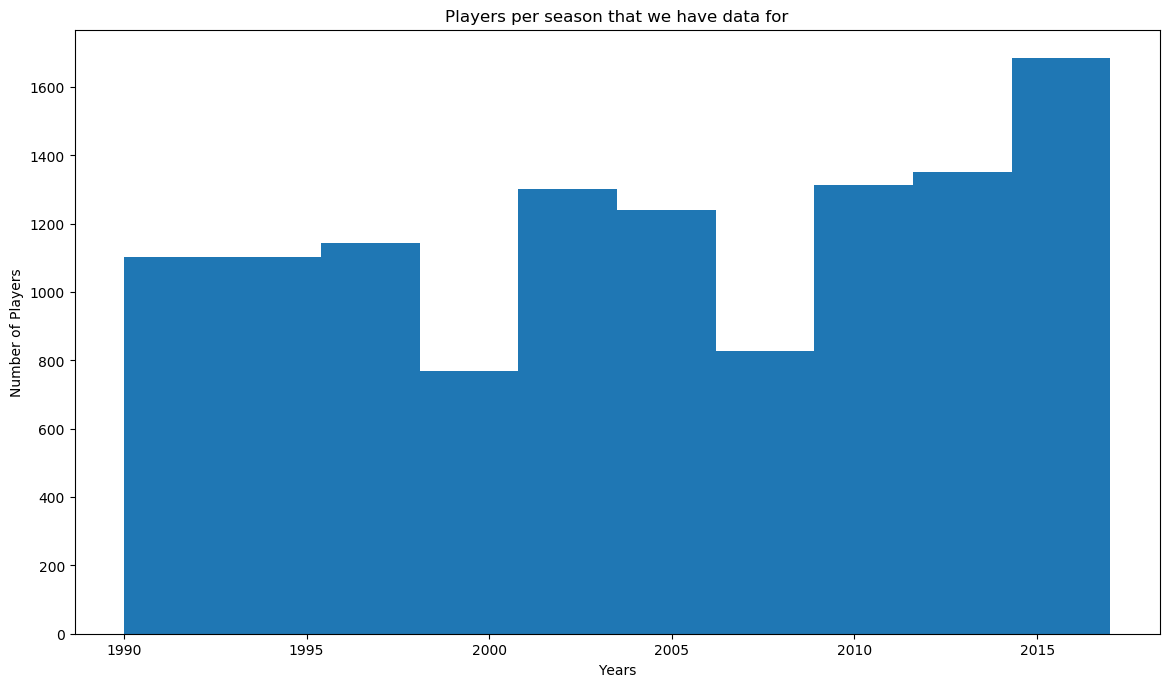

In [11]:
# plt.show()
fig, axs = plt.subplots(nrows=1,ncols=1,figsize=(14, 8))

axs.hist(x=salaries['Season Start'])
axs.set_title('Players per season that we have data for')
axs.set_xlabel('Years')
axs.set_ylabel('Number of Players')

plt.subplots_adjust(wspace=0.3, hspace=0.4)
# plt.show()


For this dataset, we don't have any missing values as you can see

From the head of the salaries dataset, we can see that we have salaries only starting from 1990, so we will have to keep that in mind when merging the datasets and creating our final dataset

## Dataset 2: NBA Players Stats

You can find the dataset here: https://www.kaggle.com/drgilermo/nba-players-stats

This dataset was composed of 3 CSVs, we chose to cut the "player_data.csv" since it didn't match correctly with the other two datasets.
The information it held did not impact the progeress as similar info already exists in the more consistent "players.csv" file.

We first decided to match the stats data to our other target dataset (more below) of salaries in terms of years. We cut the entires before 1990 as to keep it consistent with the salaries dataset. We did this also because we saw more robust entry of stat information in the later years.

In [12]:
# Read the CSV file
players = pd.read_csv('./player_stats/players.csv')
players.head()

,Unnamed: 0,Player,height,weight,collage,born,birth_city,birth_state
0,0,Curly Armstrong,180.0,77.0,Indiana University,1918.0,NaN,NaN
1,1,Cliff Barker,188.0,83.0,University of Kentucky,1921.0,Yorktown,Indiana
2,2,Leo Barnhorst,193.0,86.0,University of Notre Dame,1924.0,NaN,NaN
3,3,Ed Bartels,196.0,88.0,North Carolina State University,1925.0,NaN,NaN
4,4,Ralph Beard,178.0,79.0,University of Kentucky,1927.0,Hardinsburg,Kentucky


In [13]:
players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3922 entries, 0 to 3921
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   3922 non-null   int64  
 1   Player       3921 non-null   object 
 2   height       3921 non-null   float64
 3   weight       3921 non-null   float64
 4   collage      3573 non-null   object 
 5   born         3921 non-null   float64
 6   birth_city   3452 non-null   object 
 7   birth_state  3439 non-null   object 
dtypes: float64(3), int64(1), object(4)
memory usage: 245.2+ KB


In [14]:
players.describe()

,Unnamed: 0,height,weight,born
count,3922.000000,3921.000000,3921.000000,3921.00000
mean,1960.500000,198.704922,94.783219,1962.37975
std,1132.328206,9.269761,12.039515,20.33491
min,0.000000,160.000000,60.000000,1913.00000
25%,980.250000,190.000000,86.000000,1948.00000
50%,1960.500000,198.000000,95.000000,1964.00000
75%,2940.750000,206.000000,102.000000,1979.00000
max,3921.000000,231.000000,163.000000,1997.00000


In [15]:
nans = np.sum(players.isnull())

print('Invalid enteries in the Players file:')
print(nans)

Invalid enteries in the Players file:
Unnamed: 0       0
Player           1
height           1
weight           1
collage        349
born             1
birth_city     470
birth_state    483
dtype: int64


In [16]:
# Read the CSV file
seasons = pd.read_csv('./player_stats/seasons_stats.csv')
seasons.head()

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,...,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,...,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,...,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,...,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0


In [17]:
seasons.dtypes

Unnamed: 0      int64
Year          float64
Player         object
Pos            object
Age           float64
Tm             object
G             float64
GS            float64
MP            float64
PER           float64
TS%           float64
3PAr          float64
FTr           float64
ORB%          float64
DRB%          float64
TRB%          float64
AST%          float64
STL%          float64
BLK%          float64
TOV%          float64
USG%          float64
blanl         float64
OWS           float64
DWS           float64
WS            float64
WS/48         float64
blank2        float64
OBPM          float64
DBPM          float64
BPM           float64
VORP          float64
FG            float64
FGA           float64
FG%           float64
3P            float64
3PA           float64
3P%           float64
2P            float64
2PA           float64
2P%           float64
eFG%          float64
FT            float64
FTA           float64
FT%           float64
ORB           float64
DRB       

In [18]:
seasons.describe

<bound method NDFrame.describe of        Unnamed: 0    Year             Player  Pos   Age   Tm     G    GS  \
0               0  1950.0    Curly Armstrong  G-F  31.0  FTW  63.0   NaN   
1               1  1950.0       Cliff Barker   SG  29.0  INO  49.0   NaN   
2               2  1950.0      Leo Barnhorst   SF  25.0  CHS  67.0   NaN   
3               3  1950.0         Ed Bartels    F  24.0  TOT  15.0   NaN   
4               4  1950.0         Ed Bartels    F  24.0  DNN  13.0   NaN   
...           ...     ...                ...  ...   ...  ...   ...   ...   
24686       24686  2017.0        Cody Zeller   PF  24.0  CHO  62.0  58.0   
24687       24687  2017.0       Tyler Zeller    C  27.0  BOS  51.0   5.0   
24688       24688  2017.0  Stephen Zimmerman    C  20.0  ORL  19.0   0.0   
24689       24689  2017.0        Paul Zipser   SF  22.0  CHI  44.0  18.0   
24690       24690  2017.0        Ivica Zubac    C  19.0  LAL  38.0  11.0   

           MP   PER  ...    FT%    ORB    DRB    TRB 

In [19]:
nans = np.sum(seasons.isnull())

print('Invalid enteries in Seasons dataset:')
print(nans)

Invalid enteries in Seasons dataset:
Unnamed: 0        0
Year             67
Player           67
Pos              67
Age              75
Tm               67
G                67
GS             6458
MP              553
PER             590
TS%             153
3PAr           5852
FTr             166
ORB%           3899
DRB%           3899
TRB%           3120
AST%           2136
STL%           3899
BLK%           3899
TOV%           5109
USG%           5051
blanl         24691
OWS             106
DWS             106
WS              106
WS/48           590
blank2        24691
OBPM           3894
DBPM           3894
BPM            3894
VORP           3894
FG               67
FGA              67
FG%             166
3P             5764
3PA            5764
3P%            9275
2P               67
2PA              67
2P%             195
eFG%            166
FT               67
FTA              67
FT%             925
ORB            3894
DRB            3894
TRB             379
AST              67
STL

We remove all the data from before 1991, since we only have salaries starting from that season

In [20]:
seasons = seasons[seasons['Year'] >= 1991]

In [21]:
seasons

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
10007,10007,1991.0,Alaa Abdelnaby,PF,22.0,POR,43.0,0.0,290.0,13.1,...,0.568,27.0,62.0,89.0,12.0,4.0,12.0,22.0,39.0,135.0
10008,10008,1991.0,Mahmoud Abdul-Rauf,PG,21.0,DEN,67.0,19.0,1505.0,12.2,...,0.857,34.0,87.0,121.0,206.0,55.0,4.0,110.0,149.0,942.0
10009,10009,1991.0,Mark Acres,C,28.0,ORL,68.0,0.0,1313.0,9.2,...,0.653,140.0,219.0,359.0,25.0,25.0,25.0,42.0,218.0,285.0
10010,10010,1991.0,Michael Adams,PG,28.0,DEN,66.0,66.0,2346.0,22.3,...,0.879,58.0,198.0,256.0,693.0,147.0,6.0,240.0,162.0,1752.0
10011,10011,1991.0,Mark Aguirre,SF,31.0,DET,78.0,13.0,2006.0,16.7,...,0.757,134.0,240.0,374.0,139.0,47.0,20.0,128.0,209.0,1104.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24686,24686,2017.0,Cody Zeller,PF,24.0,CHO,62.0,58.0,1725.0,16.7,...,0.679,135.0,270.0,405.0,99.0,62.0,58.0,65.0,189.0,639.0
24687,24687,2017.0,Tyler Zeller,C,27.0,BOS,51.0,5.0,525.0,13.0,...,0.564,43.0,81.0,124.0,42.0,7.0,21.0,20.0,61.0,178.0
24688,24688,2017.0,Stephen Zimmerman,C,20.0,ORL,19.0,0.0,108.0,7.3,...,0.600,11.0,24.0,35.0,4.0,2.0,5.0,3.0,17.0,23.0
24689,24689,2017.0,Paul Zipser,SF,22.0,CHI,44.0,18.0,843.0,6.9,...,0.775,15.0,110.0,125.0,36.0,15.0,16.0,40.0,78.0,240.0


## D2.3: Data Wrangling

In [22]:
df_NBA = pd.merge(seasons, salaries,  how='left', left_on=['Player','Year'], right_on = ['Player Name','Season End'])

In [23]:
df_NBA

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,TOV,PF,PTS,Register Value,Player Name,Salary,Season Start,Season End,Team,Full Team Name
0,10007,1991.0,Alaa Abdelnaby,PF,22.0,POR,43.0,0.0,290.0,13.1,...,22.0,39.0,135.0,6.0,Alaa Abdelnaby,7.282472e+05,1990.0,1991.0,POR,Portland Trail Blazers
1,10008,1991.0,Mahmoud Abdul-Rauf,PG,21.0,DEN,67.0,19.0,1505.0,12.2,...,110.0,149.0,942.0,214.0,Mahmoud Abdul-Rauf,3.060482e+06,1990.0,1991.0,DEN,Denver Nuggets
2,10009,1991.0,Mark Acres,C,28.0,ORL,68.0,0.0,1313.0,9.2,...,42.0,218.0,285.0,218.0,Mark Acres,8.056810e+05,1990.0,1991.0,ORL,Orlando Magic
3,10010,1991.0,Michael Adams,PG,28.0,DEN,66.0,66.0,2346.0,22.3,...,240.0,162.0,1752.0,228.0,Michael Adams,1.521023e+06,1990.0,1991.0,DEN,Denver Nuggets
4,10011,1991.0,Mark Aguirre,SF,31.0,DET,78.0,13.0,2006.0,16.7,...,128.0,209.0,1104.0,219.0,Mark Aguirre,2.055685e+06,1990.0,1991.0,DET,Detroit Pistons
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15265,24686,2017.0,Cody Zeller,PF,24.0,CHO,62.0,58.0,1725.0,16.7,...,65.0,189.0,639.0,10826.0,Cody Zeller,5.448212e+06,2016.0,2017.0,CHA,Charlotte Hornets
15266,24687,2017.0,Tyler Zeller,C,27.0,BOS,51.0,5.0,525.0,13.0,...,20.0,61.0,178.0,11299.0,Tyler Zeller,8.195398e+06,2016.0,2017.0,BOS,Boston Celtic
15267,24688,2017.0,Stephen Zimmerman,C,20.0,ORL,19.0,0.0,108.0,7.3,...,3.0,17.0,23.0,11255.0,Stephen Zimmerman,9.732035e+05,2016.0,2017.0,ORL,Orlando Magic
15268,24689,2017.0,Paul Zipser,SF,22.0,CHI,44.0,18.0,843.0,6.9,...,40.0,78.0,240.0,11187.0,Paul Zipser,7.683186e+05,2016.0,2017.0,CHI,Chicago Bulls


In [24]:
df_NBA.dropna(subset=['Player Name'], inplace=True)

In [25]:
nans = np.sum(df_NBA.isnull())

print('Invalid enteries in the Players file:')
print(nans)

Invalid enteries in the Players file:
Unnamed: 0            0
Year                  0
Player                0
Pos                   0
Age                   0
Tm                    0
G                     0
GS                    0
MP                    0
PER                   5
TS%                  55
3PAr                 58
FTr                  58
ORB%                  5
DRB%                  5
TRB%                  5
AST%                  5
STL%                  5
BLK%                  5
TOV%                 45
USG%                  5
blanl             12730
OWS                   0
DWS                   0
WS                    0
WS/48                 5
blank2            12730
OBPM                  0
DBPM                  0
BPM                   0
VORP                  0
FG                    0
FGA                   0
FG%                  58
3P                    0
3PA                   0
3P%                2094
2P                    0
2PA                   0
2P%                  89
eF

In [26]:
df_NBA.drop(['Unnamed: 0','blanl','blank2', 'Tm','Full Team Name','Season Start','Season End','Player Name','Register Value'], inplace=True, axis=1)

In [27]:
nans = np.sum(df_NBA.isnull())

print('Invalid enteries in the Players file:')
print(nans)

Invalid enteries in the Players file:
Year         0
Player       0
Pos          0
Age          0
G            0
GS           0
MP           0
PER          5
TS%         55
3PAr        58
FTr         58
ORB%         5
DRB%         5
TRB%         5
AST%         5
STL%         5
BLK%         5
TOV%        45
USG%         5
OWS          0
DWS          0
WS           0
WS/48        5
OBPM         0
DBPM         0
BPM          0
VORP         0
FG           0
FGA          0
FG%         58
3P           0
3PA          0
3P%       2094
2P           0
2PA          0
2P%         89
eFG%        58
FT           0
FTA          0
FT%        518
ORB          0
DRB          0
TRB          0
AST          0
STL          0
BLK          0
TOV          0
PF           0
PTS          0
Salary       0
Team         0
dtype: int64


In [28]:
df_NBA[['3P', '3PA','3P%']]

,3P,3PA,3P%
0,0.0,0.0,NaN
1,24.0,100.0,0.240
2,1.0,3.0,0.333
3,167.0,564.0,0.296
4,24.0,78.0,0.308
...,...,...,...
15265,0.0,1.0,0.000
15266,0.0,1.0,0.000
15267,0.0,0.0,NaN
15268,33.0,99.0,0.333


In [29]:
indices= df_NBA[ (df_NBA['3P'] == 0) & (df_NBA['3PA'] == 0) & (df_NBA['3P%'] != 0)].index

df_NBA.drop(indices, inplace = True)

In [30]:
df_NBA

,Year,Player,Pos,Age,G,GS,MP,PER,TS%,3PAr,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Salary,Team
1,1991.0,Mahmoud Abdul-Rauf,PG,21.0,67.0,19.0,1505.0,12.2,0.448,0.099,...,87.0,121.0,206.0,55.0,4.0,110.0,149.0,942.0,3.060482e+06,DEN
2,1991.0,Mark Acres,C,28.0,68.0,0.0,1313.0,9.2,0.551,0.014,...,219.0,359.0,25.0,25.0,25.0,42.0,218.0,285.0,8.056810e+05,ORL
3,1991.0,Michael Adams,PG,28.0,66.0,66.0,2346.0,22.3,0.530,0.397,...,198.0,256.0,693.0,147.0,6.0,240.0,162.0,1752.0,1.521023e+06,DEN
4,1991.0,Mark Aguirre,SF,31.0,78.0,13.0,2006.0,16.7,0.526,0.086,...,240.0,374.0,139.0,47.0,20.0,128.0,209.0,1104.0,2.055685e+06,DET
5,1991.0,Danny Ainge,SG,31.0,80.0,0.0,1710.0,17.0,0.574,0.352,...,160.0,205.0,285.0,63.0,13.0,100.0,195.0,890.0,1.336656e+06,POR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15264,2017.0,Thaddeus Young,PF,28.0,74.0,74.0,2237.0,14.9,0.562,0.172,...,318.0,449.0,122.0,114.0,30.0,96.0,135.0,814.0,1.449935e+07,IND
15265,2017.0,Cody Zeller,PF,24.0,62.0,58.0,1725.0,16.7,0.604,0.002,...,270.0,405.0,99.0,62.0,58.0,65.0,189.0,639.0,5.448212e+06,CHA
15266,2017.0,Tyler Zeller,C,27.0,51.0,5.0,525.0,13.0,0.508,0.006,...,81.0,124.0,42.0,7.0,21.0,20.0,61.0,178.0,8.195398e+06,BOS
15268,2017.0,Paul Zipser,SF,22.0,44.0,18.0,843.0,6.9,0.503,0.448,...,110.0,125.0,36.0,15.0,16.0,40.0,78.0,240.0,7.683186e+05,CHI


In [31]:
df_NBA[['3P', '3PA','3P%']]

,3P,3PA,3P%
1,24.0,100.0,0.240
2,1.0,3.0,0.333
3,167.0,564.0,0.296
4,24.0,78.0,0.308
5,102.0,251.0,0.406
...,...,...,...
15264,45.0,118.0,0.381
15265,0.0,1.0,0.000
15266,0.0,1.0,0.000
15268,33.0,99.0,0.333


In [32]:
nans = np.sum(df_NBA.isnull())

print('Invalid enteries in the Players file:')
print(nans)

Invalid enteries in the Players file:
Year        0
Player      0
Pos         0
Age         0
G           0
GS          0
MP          0
PER         0
TS%         0
3PAr        0
FTr         0
ORB%        0
DRB%        0
TRB%        0
AST%        0
STL%        0
BLK%        0
TOV%        0
USG%        0
OWS         0
DWS         0
WS          0
WS/48       0
OBPM        0
DBPM        0
BPM         0
VORP        0
FG          0
FGA         0
FG%         0
3P          0
3PA         0
3P%         0
2P          0
2PA         0
2P%        31
eFG%        0
FT          0
FTA         0
FT%       249
ORB         0
DRB         0
TRB         0
AST         0
STL         0
BLK         0
TOV         0
PF          0
PTS         0
Salary      0
Team        0
dtype: int64


In [33]:
df_NBA.dropna(inplace=True)

In [34]:
nans = np.sum(df_NBA.isnull())

print('Invalid enteries in the Players file:')
print(nans)

Invalid enteries in the Players file:
Year      0
Player    0
Pos       0
Age       0
G         0
GS        0
MP        0
PER       0
TS%       0
3PAr      0
FTr       0
ORB%      0
DRB%      0
TRB%      0
AST%      0
STL%      0
BLK%      0
TOV%      0
USG%      0
OWS       0
DWS       0
WS        0
WS/48     0
OBPM      0
DBPM      0
BPM       0
VORP      0
FG        0
FGA       0
FG%       0
3P        0
3PA       0
3P%       0
2P        0
2PA       0
2P%       0
eFG%      0
FT        0
FTA       0
FT%       0
ORB       0
DRB       0
TRB       0
AST       0
STL       0
BLK       0
TOV       0
PF        0
PTS       0
Salary    0
Team      0
dtype: int64


## D2.4: Feature Engineering

 Andrej's about year

In [35]:
X = df_NBA.iloc[:,3:-2]
X

,Age,G,GS,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
1,21.0,67.0,19.0,1505.0,12.2,0.448,0.099,0.097,1.9,6.0,...,0.857,34.0,87.0,121.0,206.0,55.0,4.0,110.0,149.0,942.0
2,28.0,68.0,0.0,1313.0,9.2,0.551,0.014,0.472,11.3,18.7,...,0.653,140.0,219.0,359.0,25.0,25.0,25.0,42.0,218.0,285.0
3,28.0,66.0,66.0,2346.0,22.3,0.530,0.397,0.372,2.1,8.8,...,0.879,58.0,198.0,256.0,693.0,147.0,6.0,240.0,162.0,1752.0
4,31.0,78.0,13.0,2006.0,16.7,0.526,0.086,0.349,7.6,13.7,...,0.757,134.0,240.0,374.0,139.0,47.0,20.0,128.0,209.0,1104.0
5,31.0,80.0,0.0,1710.0,17.0,0.574,0.352,0.193,2.9,10.2,...,0.826,45.0,160.0,205.0,285.0,63.0,13.0,100.0,195.0,890.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15264,28.0,74.0,74.0,2237.0,14.9,0.562,0.172,0.125,6.7,15.8,...,0.523,131.0,318.0,449.0,122.0,114.0,30.0,96.0,135.0,814.0
15265,24.0,62.0,58.0,1725.0,16.7,0.604,0.002,0.442,8.6,17.3,...,0.679,135.0,270.0,405.0,99.0,62.0,58.0,65.0,189.0,639.0
15266,27.0,51.0,5.0,525.0,13.0,0.508,0.006,0.247,9.2,17.0,...,0.564,43.0,81.0,124.0,42.0,7.0,21.0,20.0,61.0,178.0
15268,22.0,44.0,18.0,843.0,6.9,0.503,0.448,0.181,1.9,14.2,...,0.775,15.0,110.0,125.0,36.0,15.0,16.0,40.0,78.0,240.0


In [36]:
df_NBA.drop(['PER', 'OWS', 'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP'], axis=1, inplace=True)

In [37]:
# Y = df_NBA[['Salary']]
df_NBA["Salary"] = df_NBA["Salary"].round(0)
df_NBA["Salary"] = df_NBA["Salary"].astype(str)
df_NBA

,Year,Player,Pos,Age,G,GS,MP,TS%,3PAr,FTr,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Salary,Team
1,1991.0,Mahmoud Abdul-Rauf,PG,21.0,67.0,19.0,1505.0,0.448,0.099,0.097,...,87.0,121.0,206.0,55.0,4.0,110.0,149.0,942.0,3060482.0,DEN
2,1991.0,Mark Acres,C,28.0,68.0,0.0,1313.0,0.551,0.014,0.472,...,219.0,359.0,25.0,25.0,25.0,42.0,218.0,285.0,805681.0,ORL
3,1991.0,Michael Adams,PG,28.0,66.0,66.0,2346.0,0.530,0.397,0.372,...,198.0,256.0,693.0,147.0,6.0,240.0,162.0,1752.0,1521023.0,DEN
4,1991.0,Mark Aguirre,SF,31.0,78.0,13.0,2006.0,0.526,0.086,0.349,...,240.0,374.0,139.0,47.0,20.0,128.0,209.0,1104.0,2055685.0,DET
5,1991.0,Danny Ainge,SG,31.0,80.0,0.0,1710.0,0.574,0.352,0.193,...,160.0,205.0,285.0,63.0,13.0,100.0,195.0,890.0,1336656.0,POR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15264,2017.0,Thaddeus Young,PF,28.0,74.0,74.0,2237.0,0.562,0.172,0.125,...,318.0,449.0,122.0,114.0,30.0,96.0,135.0,814.0,14499352.0,IND
15265,2017.0,Cody Zeller,PF,24.0,62.0,58.0,1725.0,0.604,0.002,0.442,...,270.0,405.0,99.0,62.0,58.0,65.0,189.0,639.0,5448212.0,CHA
15266,2017.0,Tyler Zeller,C,27.0,51.0,5.0,525.0,0.508,0.006,0.247,...,81.0,124.0,42.0,7.0,21.0,20.0,61.0,178.0,8195398.0,BOS
15268,2017.0,Paul Zipser,SF,22.0,44.0,18.0,843.0,0.503,0.448,0.181,...,110.0,125.0,36.0,15.0,16.0,40.0,78.0,240.0,768319.0,CHI


#### Citation:
The code for this cell was inspired by this medium article and adjusted for our specific purposes and needs: https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e

In [38]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X = df_NBA.iloc[:,3:-2]
Y = df_NBA[['Salary']]

#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=25)
fit = bestfeatures.fit(X,Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(25,'Score'))  #print 10 best features

   Specs         Score
3     MP  5.002769e+06
36   PTS  3.339632e+06
16   FGA  2.497068e+06
22   2PA  2.282933e+06
30   TRB  1.438121e+06
15    FG  1.219613e+06
31   AST  1.183107e+06
21    2P  1.169394e+06
19   3PA  1.132556e+06
26   FTA  1.120585e+06
29   DRB  1.011409e+06
25    FT  9.166916e+05
28   ORB  5.310737e+05
18    3P  4.642702e+05
34   TOV  4.252076e+05
35    PF  3.796230e+05
33   BLK  3.637984e+05
2     GS  2.661141e+05
32   STL  2.330557e+05
1      G  7.747212e+04
10  AST%  4.608452e+04
7   ORB%  1.930303e+04
8   DRB%  1.716412e+04
9   TRB%  1.428896e+04
13  TOV%  1.108811e+04


In [39]:
best_features = pd.DataFrame(df_NBA[['MP', 'PTS', 'FGA', '2PA', 'TRB', 'FG', 'AST', '2P', '3PA', 'FTA', 'DRB', 'FT', 'ORB', '3P', 'TOV','Salary']])
best_features


,MP,PTS,FGA,2PA,TRB,FG,AST,2P,3PA,FTA,DRB,FT,ORB,3P,TOV,Salary
1,1505.0,942.0,1009.0,909.0,121.0,417.0,206.0,393.0,100.0,98.0,87.0,84.0,34.0,24.0,110.0,3060482.0
2,1313.0,285.0,214.0,211.0,359.0,109.0,25.0,108.0,3.0,101.0,219.0,66.0,140.0,1.0,42.0,805681.0
3,2346.0,1752.0,1421.0,857.0,256.0,560.0,693.0,393.0,564.0,529.0,198.0,465.0,58.0,167.0,240.0,1521023.0
4,2006.0,1104.0,909.0,831.0,374.0,420.0,139.0,396.0,78.0,317.0,240.0,240.0,134.0,24.0,128.0,2055685.0
5,1710.0,890.0,714.0,463.0,205.0,337.0,285.0,235.0,251.0,138.0,160.0,114.0,45.0,102.0,100.0,1336656.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15264,2237.0,814.0,687.0,569.0,449.0,362.0,122.0,317.0,118.0,86.0,318.0,45.0,131.0,45.0,96.0,14499352.0
15265,1725.0,639.0,443.0,442.0,405.0,253.0,99.0,253.0,1.0,196.0,270.0,133.0,135.0,0.0,65.0,5448212.0
15266,525.0,178.0,158.0,157.0,124.0,78.0,42.0,78.0,1.0,39.0,81.0,22.0,43.0,0.0,20.0,8195398.0
15268,843.0,240.0,221.0,122.0,125.0,88.0,36.0,55.0,99.0,40.0,110.0,31.0,15.0,33.0,40.0,768319.0


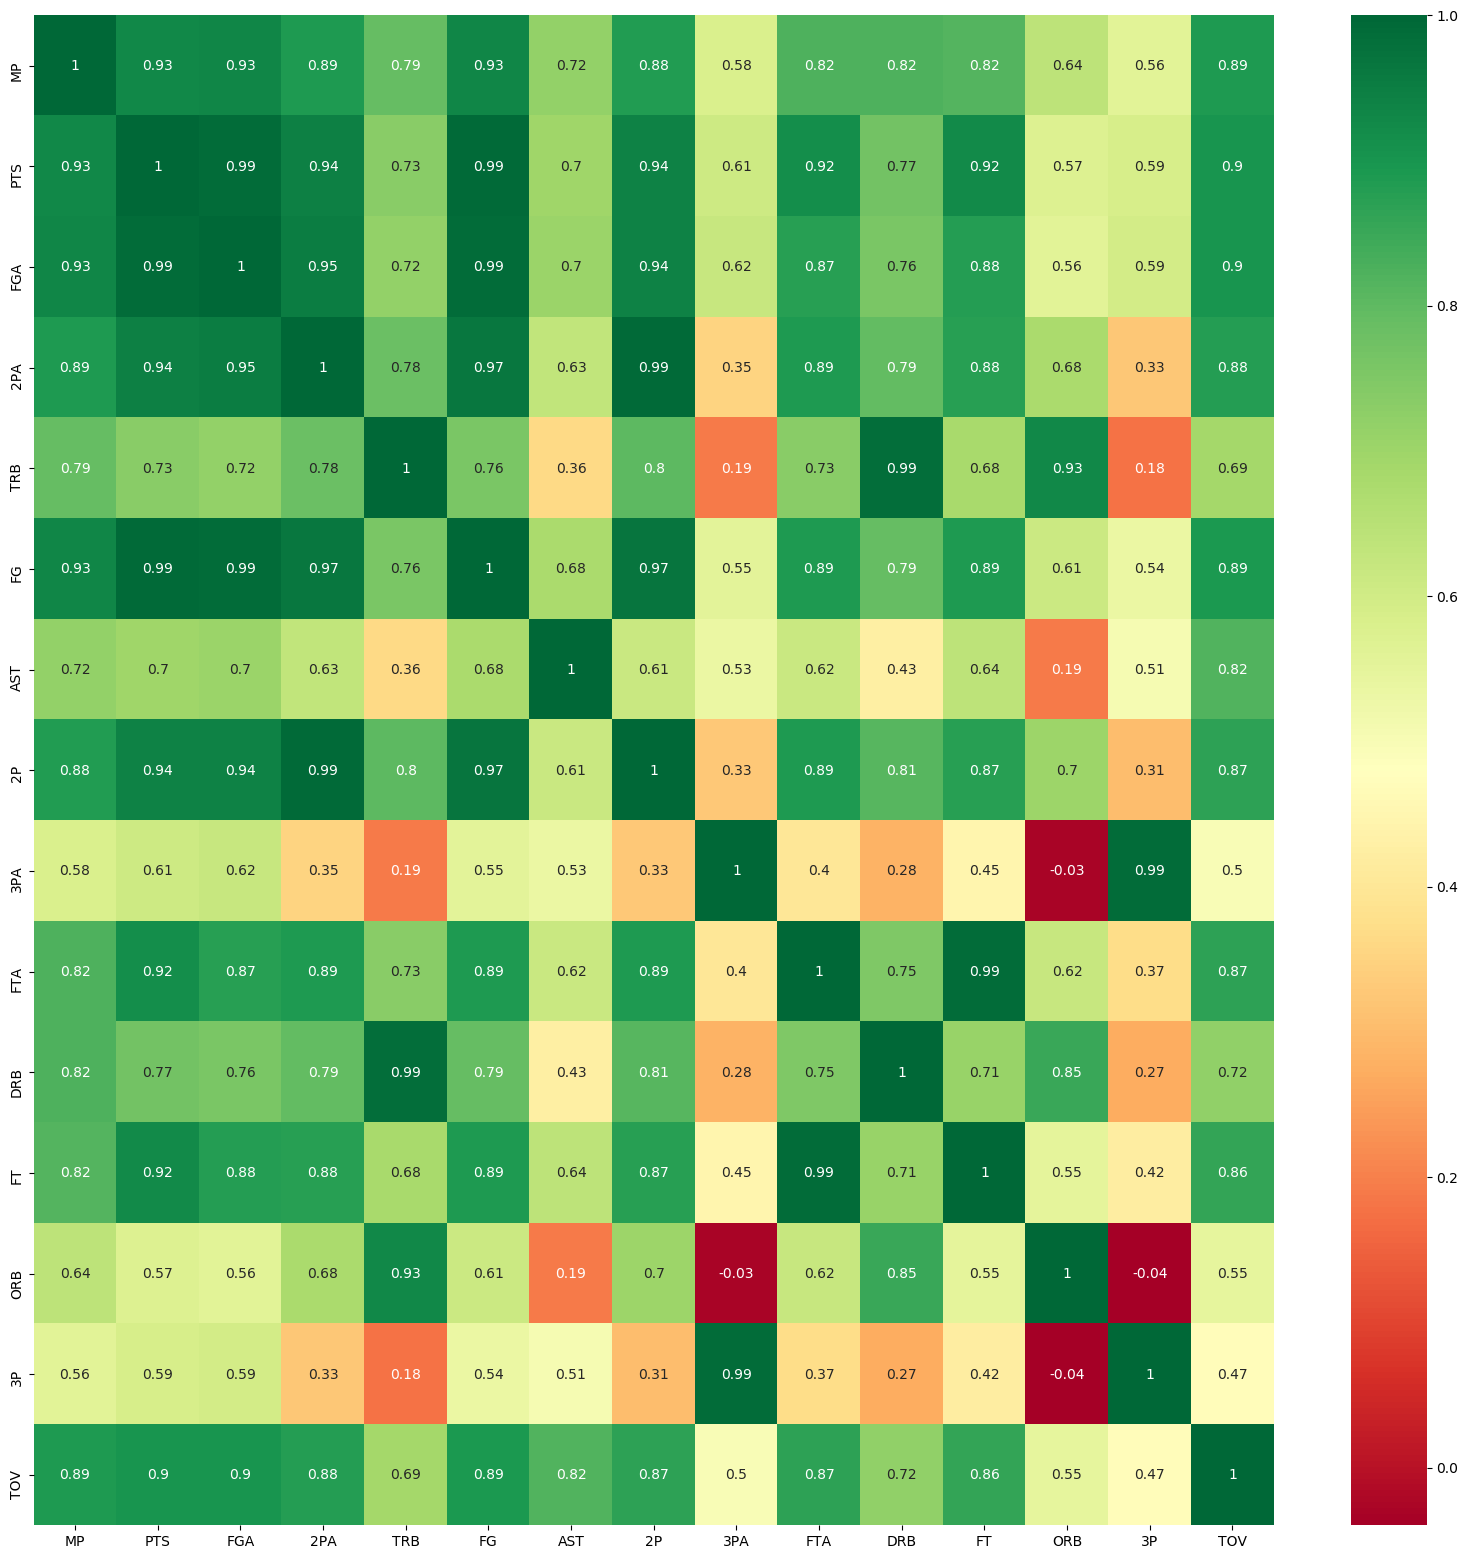

In [40]:
import seaborn as sns

#get correlations of each features in dataset
corrmat = best_features.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(best_features[top_corr_features].corr(),annot=True,cmap="RdYlGn")

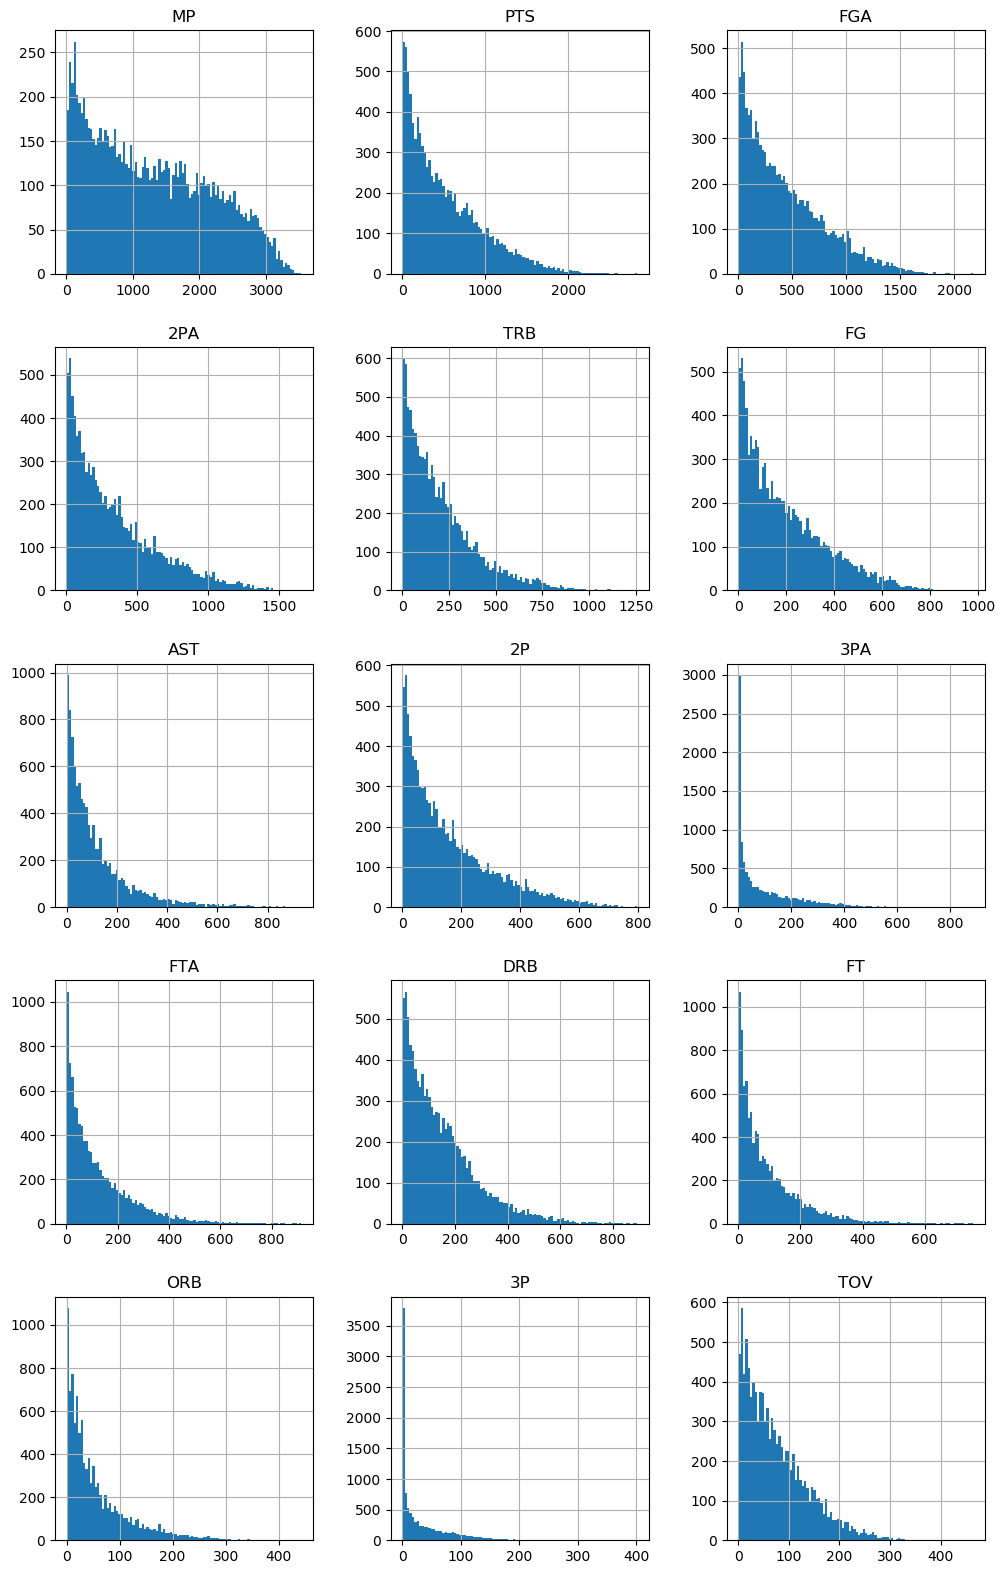

In [41]:
fig, axes = plt.subplots(len(best_features.columns)//3, 3, figsize=(12, 20))

i = 0
for triaxis in axes:
    for axis in triaxis:
        best_features.hist(column = best_features.columns[i], bins = 100, ax=axis)
        i = i+1

In [42]:
from sklearn import preprocessing

features = best_features.iloc[:,:-1]

min_max_scaler = preprocessing.MinMaxScaler().fit(features)

X_train_minmax = min_max_scaler.transform(features)

X_train_minmax

array([[0.42517007, 0.33239138, 0.46384155, ..., 0.07674944, 0.05970149,
        0.23706897],
       [0.3707483 , 0.10031791, 0.09765085, ..., 0.31602709, 0.00248756,
        0.09051724],
       [0.66354875, 0.61850936, 0.65361585, ..., 0.13092551, 0.41542289,
        0.51724138],
       ...,
       [0.14739229, 0.06252208, 0.07185629, ..., 0.09706546, 0.        ,
        0.04310345],
       [0.23752834, 0.08442247, 0.10087517, ..., 0.03386005, 0.08208955,
        0.0862069 ],
       [0.17120181, 0.09996468, 0.10870567, ..., 0.09255079, 0.        ,
        0.06465517]])

In [43]:
scaled_features = pd.DataFrame(X_train_minmax, columns = ['MP', 'PTS', 'FGA', '2PA', 'TRB', 'FG', 'AST', '2P', '3PA', 'FTA', 'DRB', 'FT', 'ORB', '3P', 'TOV'])
scaled_features

,MP,PTS,FGA,2PA,TRB,FG,AST,2P,3PA,FTA,DRB,FT,ORB,3P,TOV
0,0.425170,0.332391,0.463842,0.548972,0.096184,0.426380,0.220321,0.492481,0.111864,0.106011,0.097315,0.111111,0.076749,0.059701,0.237069
1,0.370748,0.100318,0.097651,0.126965,0.285374,0.111452,0.026738,0.135338,0.002260,0.109290,0.244966,0.087302,0.316027,0.002488,0.090517
2,0.663549,0.618509,0.653616,0.517533,0.203498,0.572597,0.741176,0.492481,0.636158,0.577049,0.221477,0.615079,0.130926,0.415423,0.517241
3,0.567177,0.389615,0.417780,0.501814,0.297297,0.429448,0.148663,0.496241,0.087006,0.345355,0.268456,0.317460,0.302483,0.059701,0.275862
4,0.483277,0.314023,0.327959,0.279323,0.162957,0.344581,0.304813,0.294486,0.282486,0.149727,0.178971,0.150794,0.101580,0.253731,0.215517
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10372,0.632653,0.287178,0.315523,0.343410,0.356916,0.370143,0.130481,0.397243,0.132203,0.092896,0.355705,0.059524,0.295711,0.111940,0.206897
10373,0.487528,0.225362,0.203132,0.266626,0.321940,0.258691,0.105882,0.317043,0.000000,0.213115,0.302013,0.175926,0.304740,0.000000,0.140086
10374,0.147392,0.062522,0.071856,0.094317,0.098569,0.079755,0.044920,0.097744,0.000000,0.041530,0.090604,0.029101,0.097065,0.000000,0.043103
10375,0.237528,0.084422,0.100875,0.073156,0.099364,0.089980,0.038503,0.068922,0.110734,0.042623,0.123043,0.041005,0.033860,0.082090,0.086207


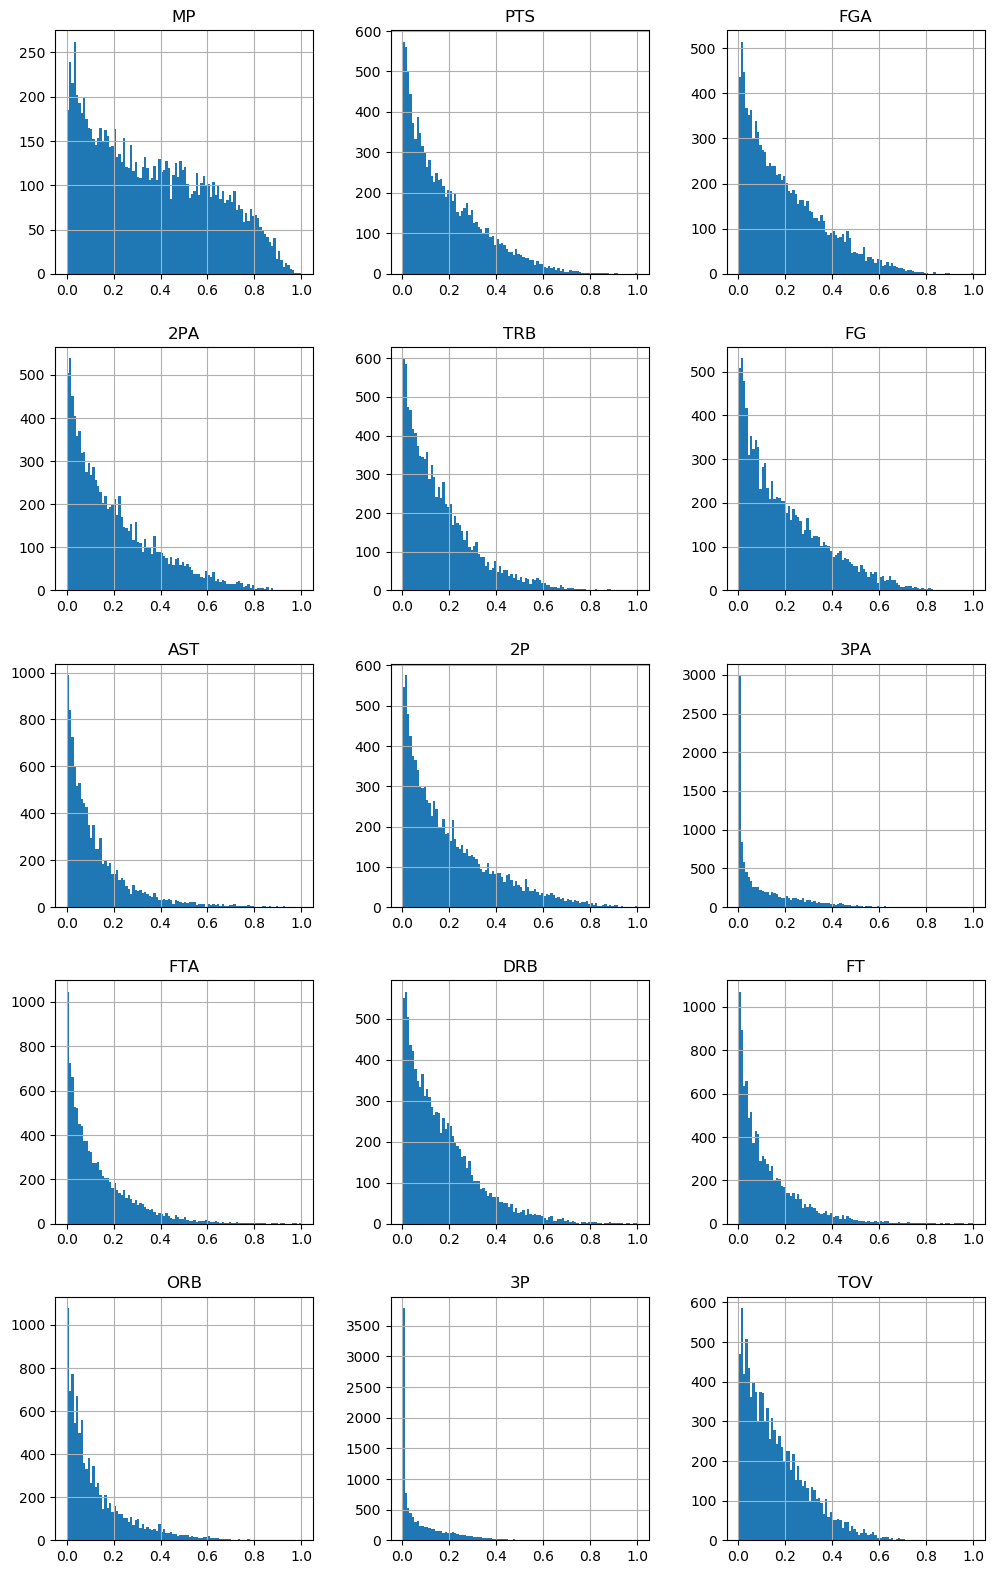

In [44]:
fig, axes = plt.subplots(len(scaled_features.columns)//3, 3, figsize=(12, 20))

i = 0
for triaxis in axes:
    for axis in triaxis:
        scaled_features.hist(column = scaled_features.columns[i], bins = 100, ax=axis)
        i = i+1

In [45]:
best_features.reset_index(inplace=True)

In [46]:
scaled_features['Salary'] = best_features['Salary']

In [47]:
final_dataset = scaled_features
final_dataset

,MP,PTS,FGA,2PA,TRB,FG,AST,2P,3PA,FTA,DRB,FT,ORB,3P,TOV,Salary
0,0.425170,0.332391,0.463842,0.548972,0.096184,0.426380,0.220321,0.492481,0.111864,0.106011,0.097315,0.111111,0.076749,0.059701,0.237069,3060482.0
1,0.370748,0.100318,0.097651,0.126965,0.285374,0.111452,0.026738,0.135338,0.002260,0.109290,0.244966,0.087302,0.316027,0.002488,0.090517,805681.0
2,0.663549,0.618509,0.653616,0.517533,0.203498,0.572597,0.741176,0.492481,0.636158,0.577049,0.221477,0.615079,0.130926,0.415423,0.517241,1521023.0
3,0.567177,0.389615,0.417780,0.501814,0.297297,0.429448,0.148663,0.496241,0.087006,0.345355,0.268456,0.317460,0.302483,0.059701,0.275862,2055685.0
4,0.483277,0.314023,0.327959,0.279323,0.162957,0.344581,0.304813,0.294486,0.282486,0.149727,0.178971,0.150794,0.101580,0.253731,0.215517,1336656.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10372,0.632653,0.287178,0.315523,0.343410,0.356916,0.370143,0.130481,0.397243,0.132203,0.092896,0.355705,0.059524,0.295711,0.111940,0.206897,14499352.0
10373,0.487528,0.225362,0.203132,0.266626,0.321940,0.258691,0.105882,0.317043,0.000000,0.213115,0.302013,0.175926,0.304740,0.000000,0.140086,5448212.0
10374,0.147392,0.062522,0.071856,0.094317,0.098569,0.079755,0.044920,0.097744,0.000000,0.041530,0.090604,0.029101,0.097065,0.000000,0.043103,8195398.0
10375,0.237528,0.084422,0.100875,0.073156,0.099364,0.089980,0.038503,0.068922,0.110734,0.042623,0.123043,0.041005,0.033860,0.082090,0.086207,768319.0


## Moving forward:

When we move on to making the classifier, we still need to add the basic important features such as player height, weight, age and code their position into numeric categorical values, which we will then accordinly normalize, too.

The importance of coding the position of the players, and making it probably into the initial selection feature by the manager using our tool, as the KPIs (best features we chose) will heavily be influnced by the players position, as we can see most prominently from our graphs 3P (3 pointer shots scored) and having 3500 players who have made no 3 points. This would mean that the defense players would be given low salaries, while that is not the case, and should be based on the sub-set of the position of the player.

As for the other variables mentioned, they will serve as stats which are inherently important to decision makers, not programatically as the KPIs picked, and would still be important factors when deciding how well a player will perform in the current/nex
